In [38]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap


we add an underscore to attributes that are not being created upon the initialization of the object but by calling the object's other methods—for example, self.w_.

In [35]:
class Perceptron(object):
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, Y):
        """Fit training data"""
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update !=0.0) #int(True) = 1 and #int(False) = 0
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0, 1, -1)
    

The advantage of using NumPy over classic Python for-loop structures is that its arithmetic operations are vectorized. Vectorization means that an elemental arithmetic operation is automatically applied to all elements in an array. By formulating our arithmetic operations as a sequence of instructions on an array rather than performing a set of operations for each element one at a time, we can make better use of our modern CPU architectures with Single Instruction, Multiple Data (SIMD) support. Furthermore, NumPy uses highly optimized linear algebra libraries, such as Basic Linear Algebra Subprograms (BLAS) and Linear Algebra Package (LAPACK) that have been written in C or Fortran. Lastly, NumPy also allows us to write our code in a more compact and intuitive way using the basics of linear algebra, such as vector and matrix dot products.


In [9]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [10]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

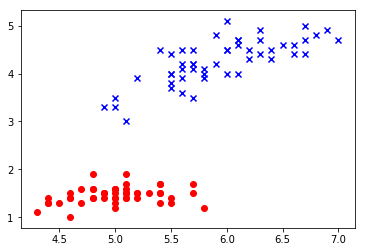

In [17]:
y = df.iloc[0:100, 4].values
y = np.where(y==1.0, -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label= 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versilor')

In [36]:
ppn = Perceptron(eta = 0., n_iter = 10)
ppn.fit(X, y)

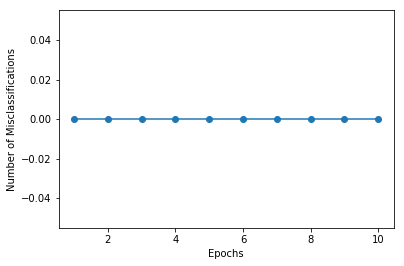

In [37]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.show()

In [46]:
def plot_decision_regions(X, y, classifier, resolution = 0.02):
     # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v') 
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max =X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max =X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                   alpha = 0.8, c = cmap(idx), marker = markers[idx],
                   label = cl)

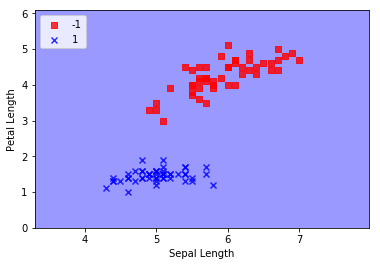

In [47]:
plot_decision_regions(X, y , ppn)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc = 'upper left')
plt.show()